data:  https://archive.ics.uci.edu/ml/datasets/adult


Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

In [1]:
#Data manipulation
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from functools import partial

import numpy as np

#Visualization & Graphic EDA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')

#Preprocessing
from sklearn.preprocessing import LabelEncoder, Imputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import learning_curve, ShuffleSplit

#Assessment
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, make_scorer

In [34]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [92]:
#Let's load it
train = pd.read_hdf('train.adult.h5')

In [24]:
train.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,False,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,False,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,False,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,5178,0,40,United-States,>50K


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int8
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null bool
Capital Gain      32561 non-null int16
Capital Loss      32561 non-null int16
Hours per week    32561 non-null int8
Country           31978 non-null object
Target            32561 non-null object
dtypes: bool(1), int16(2), int64(2), int8(2), object(8)
memory usage: 2.9+ MB


Based on that table we know that in data set we have 32561 rows. 
Additionaly we can see all features for which we can understand the tape & # of non null values. 

First goal would be to eliminate nulls from data.

In [5]:
train.isnull().any()

Age               False
Workclass          True
fnlwgt            False
Education         False
Education-Num     False
Martial Status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital Gain      False
Capital Loss      False
Hours per week    False
Country            True
Target            False
dtype: bool

In [ ]:
a4_dims = (11.7, 8.27)
df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)
seaborn.violinplot(ax=ax, data=df, **violin_options)

In [29]:
#Because columns which contain NaN are object object type feature - at first we need to change that for int to change NaN values for any other.
cat_feats = train.select_dtypes(include=[np.object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize(train[cat_feat] )[0]
    
train.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target,Workclass_cat,Education_cat,Martial Status_cat,Occupation_cat,Relationship_cat,Race_cat,Country_cat,Target_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,True,2174,0,40,United-States,<=50K,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,13,United-States,<=50K,1,0,1,1,1,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,True,0,0,40,United-States,<=50K,2,1,2,2,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,True,0,0,40,United-States,<=50K,2,2,1,2,1,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,False,0,0,40,Cuba,<=50K,2,0,1,3,2,1,1,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,False,0,0,40,United-States,<=50K,2,3,1,1,2,0,0,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,False,0,0,16,Jamaica,<=50K,2,4,3,4,0,1,2,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,True,0,0,45,United-States,>50K,1,1,1,1,1,0,0,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,False,14084,0,50,United-States,>50K,2,3,0,3,0,0,0,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,True,5178,0,40,United-States,>50K,2,0,1,1,1,0,0,1


In [39]:
train['Workclass'].value_counts(dropna = False)
train['Occupation'].value_counts(dropna = False)
train['Country'].value_counts(dropna = False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
NaN                  1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

United-States                 29170
Mexico                          643
NaN                             583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [42]:
train['Workclass_cat'].fillna(-1)
train['Occupation_cat'].fillna(-1)
train['Country_cat'].fillna(-1)


0        0
1        1
2        2
3        2
4        2
5        2
6        2
7        1
8        2
9        2
10       2
11       0
12       2
13       2
14       2
15       2
16       1
17       2
18       2
19       1
20       2
21       2
22       3
23       2
24       2
25       4
26       2
27      -1
28       2
29       2
30       4
31       2
32       2
33       3
34       0
35       2
36       2
37       2
38       2
39       1
40       2
41       1
42       2
43       2
44       2
45       3
46       2
47       2
48       0
49       2
50       2
51       2
52       2
53       3
54       5
55       2
56       2
57       2
58       2
59       2
60       2
61      -1
62       2
63       2
64       2
65       2
66       2
67       2
68       5
69      -1
70       2
71       2
72       1
73       2
74       2
75       2
76       2
77      -1
78       2
79       4
80       2
81       2
82       2
83       2
84       2
85       2
86       4
87       2
88       2
89       3
90       2

0         0
1         1
2         2
3         2
4         3
5         1
6         4
7         1
8         3
9         1
10        1
11        3
12        0
13        5
14        6
15        7
16        8
17        9
18        5
19        1
20        3
21        4
22        8
23        7
24       10
25       10
26        6
27       -1
28        1
29        6
30       11
31        5
32        1
33        0
34        4
35        9
36        9
37        0
38        5
39        3
40        9
41        3
42       10
43        0
44        2
45        3
46        9
47        1
48        6
49        3
50        1
51        4
52        3
53        1
54        1
55       10
56        9
57        4
58        0
59        9
60        5
61       -1
62        7
63        3
64       10
65        6
66        0
67        0
68        1
69       -1
70        3
71        5
72        5
73        9
74        3
75        4
76        0
77       -1
78        4
79        8
80        5
81        4
82        4
83  

0         0
1         0
2         0
3         0
4         1
5         0
6         2
7         0
8         0
9         0
10        0
11        3
12        0
13        0
14       -1
15        4
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        5
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        6
36        0
37        0
38       -1
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51       -1
52        7
53        0
54        0
55        0
56        4
57        6
58        0
59        0
60        0
61       -1
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        4
76        0
77        0
78        0
79        0
80        0
81        1
82        0
83  

In [43]:
train['Workclass_cat'].value_counts(dropna = False)
train['Occupation_cat'].value_counts(dropna = False)
train['Country_cat'].value_counts(dropna = False)

 2    22696
 1     2541
 4     2093
-1     1836
 0     1298
 5     1116
 3      960
 6       14
 7        7
Name: Workclass_cat, dtype: int64

 3     4140
 6     4099
 1     4066
 0     3770
 5     3650
 4     3295
 9     2002
-1     1843
 7     1597
 2     1370
 8      994
 10     928
 11     649
 13     149
 12       9
Name: Occupation_cat, dtype: int64

 0     29170
 4       643
-1       583
 12      198
 10      137
 9       121
 6       114
 24      106
 3       100
 1        95
 8        90
 2        81
 5        80
 27       75
 13       73
 23       70
 36       67
 26       64
 28       62
 14       60
 15       59
 20       51
 21       44
 11       43
 22       37
 35       34
 30       31
 25       29
 34       29
 18       28
 38       24
 37       20
 33       19
 16       19
 19       18
 17       18
 29       16
 31       14
 7        13
 39       13
 32       12
 40        1
Name: Country_cat, dtype: int64

In [50]:
train['Sex_cat'] = pd.factorize(train['Sex'])[0]
pd.factorize(train['Sex'])
train['Sex_cat'].value_counts()

(array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 Index([True, False], dtype='object'))

0    21790
1    10771
Name: Sex_cat, dtype: int64

In [55]:
train_cat = train.drop(['Workclass', 'Education', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country', 'Target'], axis=1)
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                   32561 non-null int8
fnlwgt                32561 non-null int64
Education-Num         32561 non-null int64
Capital Gain          32561 non-null int16
Capital Loss          32561 non-null int16
Hours per week        32561 non-null int8
Workclass_cat         32561 non-null int64
Education_cat         32561 non-null int64
Martial Status_cat    32561 non-null int64
Occupation_cat        32561 non-null int64
Relationship_cat      32561 non-null int64
Race_cat              32561 non-null int64
Country_cat           32561 non-null int64
Target_cat            32561 non-null int64
Sex_cat               32561 non-null int64
dtypes: int16(2), int64(11), int8(2)
memory usage: 4.4 MB


Here we have clean date frame which we can use for additional analysis.

But beore that we need to work on memory optimization. 

In [60]:
def memory_opt(df, data_type):
    cols = df.columns
    for col in cols:
        if df[col].dtypes == data_type:
            min1 = int(df[col].min())
            max1 = int(df[col].max())
            if (min1 >= (-128) and max1 <= 127):
                df[col] = df[col].astype('int8')
            elif (min1 >= (-32768) and max1 <= 32767):
                df[col] = df[col].astype('int16')
            elif (min1 >= (-2147483648) and max1 <= 2147483647):
                df[col] = df[col].astype('int32')
                
print("---- optimized ----")
memory_opt(train_cat, 'int64')
train_cat.info()

---- optimized ----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age                   32561 non-null int8
fnlwgt                32561 non-null int32
Education-Num         32561 non-null int8
Capital Gain          32561 non-null int16
Capital Loss          32561 non-null int16
Hours per week        32561 non-null int8
Workclass_cat         32561 non-null int8
Education_cat         32561 non-null int8
Martial Status_cat    32561 non-null int8
Occupation_cat        32561 non-null int8
Relationship_cat      32561 non-null int8
Race_cat              32561 non-null int8
Country_cat           32561 non-null int8
Target_cat            32561 non-null int8
Sex_cat               32561 non-null int8
dtypes: int16(2), int32(1), int8(12)
memory usage: 2.1 MB


We did over 50% memory reduction! That is good for performance and cost limitation!

Now we can check the correlation between:
1. Features vs Target - that will help us to select features which we use for modeling
2. Feature vs Feature -  high correlation between features will be sign for us to delete one of them

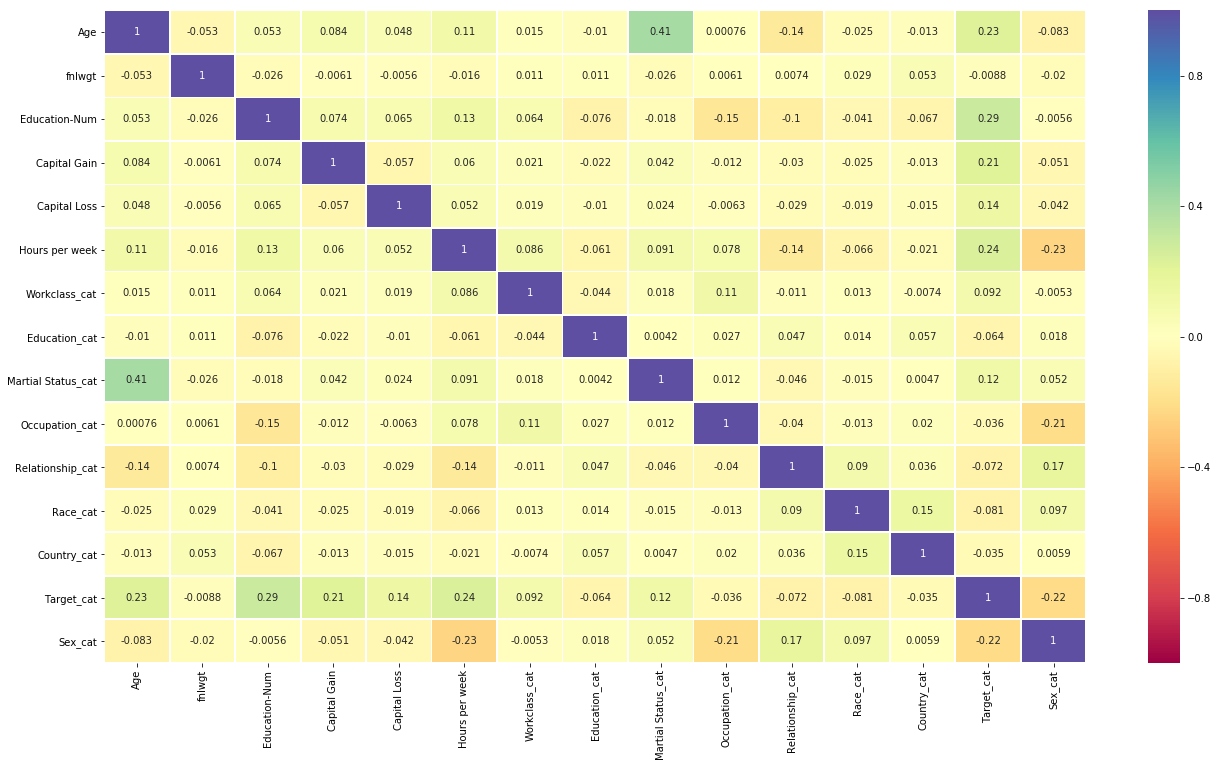

In [67]:
plt.rcParams['figure.figsize']=(22,12)
sns.heatmap(train_cat.corr(method='kendall'), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="Spectral");

Lets make very first models:

In [69]:
feats = train_cat.select_dtypes(include=['int8','int16','int64']).columns.values
feats = feats[feats!=['Target_cat']]
feats

array(['Age', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat', 'Sex_cat'], dtype=object)

In [71]:
X = train_cat[feats]
y = train_cat['Target_cat']

Because we would make multiple models we create the function to simplify code.

In [72]:
def train_and_predict(model, X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 
    return roc_auc_score(y_test, y_pred)

In [74]:
dt_model = DecisionTreeClassifier(max_depth=10, random_state=123)

In [76]:
pipe = Pipeline([('imputer',Imputer(strategy='most_frequent')),
                 ('selector', SelectKBest(f_classif,k='all')),
                 ('CF', dt_model)
                ])

In [77]:
train_and_predict(pipe, X, y, test_size=0.25)

0.7697813569947326

Even very simple model which take into consideration all features give us relatively good prediction set on 77%

.
..
...

Let's do some feature engineering

...
..
.


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 17 columns):
Age                    32561 non-null int8
Workclass              30725 non-null object
fnlwgt                 32561 non-null int64
Education              32561 non-null object
Education-Num          32561 non-null int64
Martial Status         32561 non-null object
Occupation             30718 non-null object
Relationship           32561 non-null object
Race                   32561 non-null object
Sex                    32561 non-null bool
Capital Gain           32561 non-null int16
Capital Loss           32561 non-null int16
Hours per week         32561 non-null int8
Country                31978 non-null object
Target                 32561 non-null object
be_maried              32561 non-null bool
Developed_countries    32561 non-null bool
dtypes: bool(3), int16(2), int64(2), int8(2), object(8)
memory usage: 3.0+ MB


In [107]:
train_cat['be_maried'] = ((train.Relationship.isin(['Husband','Wife'])))

train_cat['Developed_countries'] = (train.Country.isin(['United-States', 'Germany', 'Japan', 'France', 'England', 'Canada','Italy','Holand-Netherlands']))

train_cat['Hard_worker'] = ((train['Hours per week']) > 40)

train_cat['Higher_education'] = (train.Education.isin(['Bachelors','Masters','Doctorate']))

train_cat['self_employed'] = (train.Workclass.isin(['Self-emp-not-inc','Self-emp-inc']))

train_cat['Gov_worker'] = (train.Workclass.isin(['Local-gov', 'State-gov' ,'Federal-gov']))

train_cat['Priv_worker'] = (train.Workclass == 'Private')

train_cat['is_manager'] = (train.Occupation == 'Exec-managerial')

In [108]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 23 columns):
Age                    32561 non-null int8
fnlwgt                 32561 non-null int32
Education-Num          32561 non-null int8
Capital Gain           32561 non-null int16
Capital Loss           32561 non-null int16
Hours per week         32561 non-null int8
Workclass_cat          32561 non-null int8
Education_cat          32561 non-null int8
Martial Status_cat     32561 non-null int8
Occupation_cat         32561 non-null int8
Relationship_cat       32561 non-null int8
Race_cat               32561 non-null int8
Country_cat            32561 non-null int8
Target_cat             32561 non-null int8
Sex_cat                32561 non-null int8
be_maried              32561 non-null bool
Developed_countries    32561 non-null bool
Hard_worker            32561 non-null bool
Higher_education       32561 non-null bool
self_employed          32561 non-null bool
Gov_worker             32561

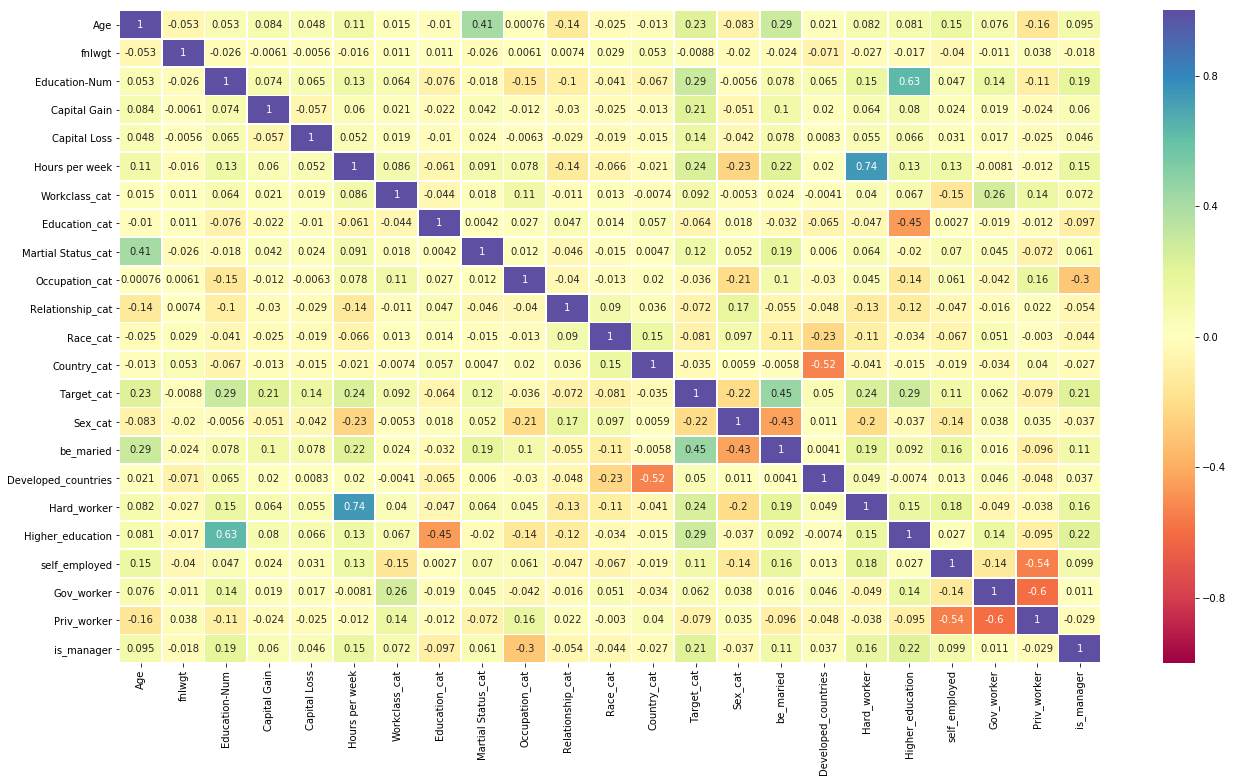

In [110]:
plt.rcParams['figure.figsize']=(22,12)
sns.heatmap(train_cat.corr(method='kendall'), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="Spectral");

In [127]:
X = train_cat[['Age', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Martial Status_cat', 'Sex_cat', 'be_maried', 'Hard_worker', 'Higher_education',
       'self_employed', 'is_manager']]
y = train_cat['Target_cat']
train_and_predict(pipe, X, y, test_size=0.25)

0.7587388585608168

In [133]:
auc_scorer = make_scorer(roc_auc_score)

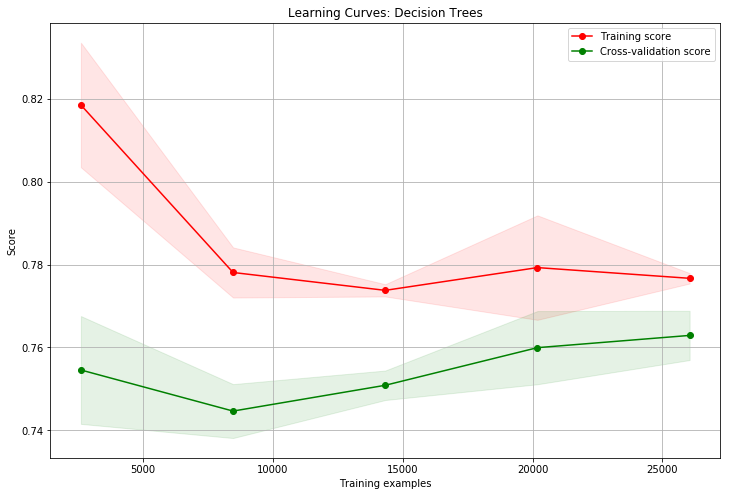

In [134]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(12,8))
    plt.title(title)
    if ylim is not None:plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=auc_scorer)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plt = plot_learning_curve(dt_model, "Learning Curves: Decision Trees", X, y, cv=5, n_jobs=-1) 
plt.show()

In [128]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=10, 
                                  min_samples_split=2, 
                                  max_features=0.4,
                                  min_samples_leaf=5,
                                  random_state=123)

In [129]:
rf_pipe = Pipeline([('imputer',Imputer(strategy='most_frequent')),
                     ('selector', SelectKBest(f_classif,k='all')),
                     ('CF', rf_model)
                    ])

In [130]:
train_and_predict(rf_pipe, X, y, test_size=0.25)

0.7581377906427502

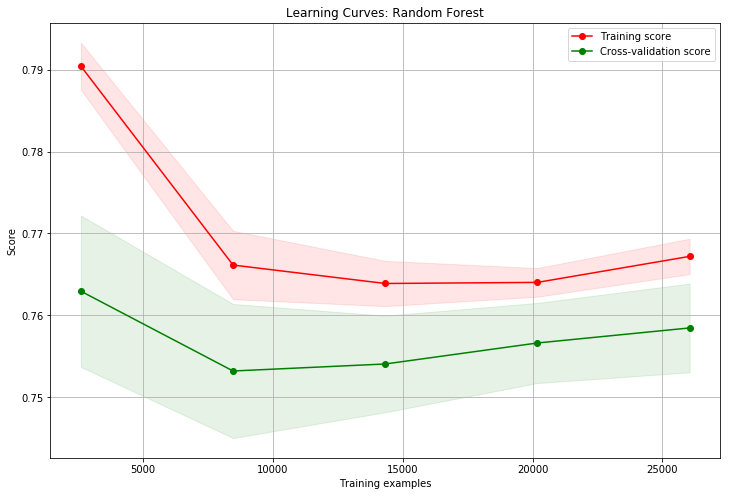

In [135]:
plt = plot_learning_curve(rf_model, "Learning Curves: Random Forest", X, y, cv=5, n_jobs=-1)
plt.show()

Text(0.5,1,'Feature importances')

<Container object of 12 artists>

([<matplotlib.axis.XTick at 0x21bc6658ac8>,
 <a list of 12 Text xticklabel objects>)

(-1, 12)

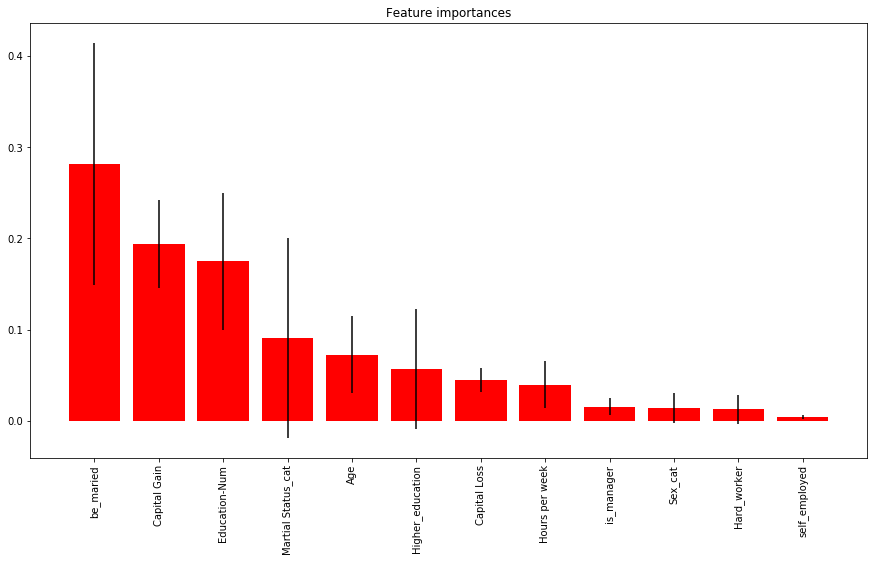

In [136]:
importances = np.array(rf_pipe.steps[2][1].feature_importances_)

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest

plt.figure(figsize=[15,8])
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()